<font size="+3" color='#053c96'><h2><center> Exploratory Data Analysis</h2></center></font>
<figure>
<center><img src ="https://cdn.educba.com/academy/wp-content/uploads/2020/01/exploratory-data-analysis.jpg.webp" width = "750" height = '600' alt="Classical Punk"/>
<font size="0" color='#053c96'><h4><center> Photo Credit: educba.com</h4></center></font>

<font size="+2" color='#053c96'><b> Contributor</b></font>  
<font size="+0" ><b> Umar Kabir</b></font>  

<a id='table-of-contents'></a>
[Table of Contents](#table-of-contents)

- [Importing Libraries](#importing-dependencies)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Exploration](#data-exploration)
  * [Data Visualization](#data-visualization)

<a id='importing-dependencies'></a>
<font size="+2" color='#053c96'><b> 1. Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [4]:
import sys
# Insert the parent path relative to this notebook so we can import from the src folder.
sys.path.insert(0, "..")

from src.dependencies import *
from src.functions import *

<a id='data'></a>
<font size="+2" color='#053c96'><b> 3. Data</b></font>  
[back to top](#table-of-contents)  

The dataset was used for the well-known paper in genre classification "Musical genre classification of audio signals" by G. Tzanetakis and P. Cook in IEEE Transactions on Audio and Speech Processing 2002.

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
data = []

for genre in genres:
    genre_dir = f'genres/{genre}'
    for filename in os.listdir(genre_dir):
        if filename.endswith('.wav'):
            audio_path = os.path.join(genre_dir, filename)
            y, sr = librosa.load(audio_path)

            # Extract features
            central_moments = np.asarray([np.mean((y - np.mean(y)) ** i) for i in range(1, 5)])
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
            rmse = librosa.feature.rms(y=y)
            tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
            spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
            spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

            # Add features to dataframe
            features = [genre, filename, beats, sr, central_moments, zero_crossing_rate[0], rmse[0], tempo, spectral_contrast, spectral_rolloff, mfccs, chroma, spectral_centroid, spectral_bandwidth]
            data.append(features)

df = pd.DataFrame(data, columns=['Genre', 'Filename', 'Beats', 'SR', 'Central Moments', 'Zero Crossing Rate', 'RMSE', 'Tempo', 'Spectral Contrast', 'Spectral Roll-off', 'MFCC', 'Chroma', 'Spectral Centroid', 'Spectral Bandwidth'])


In [ ]:
df['Beats Mean'] = df['Beats'].apply(lambda x: np.mean(x))
df['Central Moments Mean'] = df['Central Moments'].apply(lambda x: np.mean(x))
df['Zero Crossing Rate Mean'] = df['Zero Crossing Rate'].apply(lambda x: np.mean(x))
df['RMSE Mean'] = df['RMSE'].apply(lambda x: np.mean(x))
df['Spectral Contrast Mean'] = df['Spectral Contrast'].apply(lambda x: np.mean(x))
df['Spectral Roll-off Mean'] = df['Spectral Roll-off'].apply(lambda x: np.mean(x))
df['MFCC Mean'] = df['MFCC'].apply(lambda x: np.mean(x))
df['Chroma Mean'] = df['Chroma'].apply(lambda x: np.mean(x))
df['Spectral Centroid Mean'] = df['Spectral Centroid'].apply(lambda x: np.mean(x))
df['Spectral Bandwidth Mean'] = df['Spectral Bandwidth'].apply(lambda x: np.mean(x))

In [ ]:
df['Beats Var'] = df['Beats'].apply(lambda x: np.var(x))
df['Central Moments Var'] = df['Central Moments'].apply(lambda x: np.var(x))
df['Zero Crossing Rate Var'] = df['Zero Crossing Rate'].apply(lambda x: np.var(x))
df['RMSE Var'] = df['RMSE'].apply(lambda x: np.var(x))
df['Spectral Contrast Var'] = df['Spectral Contrast'].apply(lambda x: np.var(x))
df['Spectral Roll-off Var'] = df['Spectral Roll-off'].apply(lambda x: np.var(x))
df['MFCC Var'] = df['MFCC'].apply(lambda x: np.var(x))
df['Chroma Var'] = df['Chroma'].apply(lambda x: np.var(x))
df['Spectral Centroid Var'] = df['Spectral Centroid'].apply(lambda x: np.var(x))
df['Spectral Bandwidth Var'] = df['Spectral Bandwidth'].apply(lambda x: np.var(x))

In [ ]:
df['Beats Std'] = df['Beats'].apply(lambda x: np.std(x))
df['Central Moments Std'] = df['Central Moments'].apply(lambda x: np.std(x))
df['Zero Crossing Rate Std'] = df['Zero Crossing Rate'].apply(lambda x: np.std(x))
df['RMSE Std'] = df['RMSE'].apply(lambda x: np.std(x))
df['Spectral Contrast Std'] = df['Spectral Contrast'].apply(lambda x: np.std(x))
df['Spectral Roll-off Std'] = df['Spectral Roll-off'].apply(lambda x: np.std(x))
df['MFCC Std'] = df['MFCC'].apply(lambda x: np.std(x))
df['Chroma Std'] = df['Chroma'].apply(lambda x: np.std(x))
df['Spectral Centroid Std'] = df['Spectral Centroid'].apply(lambda x: np.std(x))
df['Spectral Bandwidth Std'] = df['Spectral Bandwidth'].apply(lambda x: np.std(x))

In [ ]:
df.to_csv('classical_punk.csv')

In [5]:
df = pd.read_csv('classical_punk.csv')

In [6]:
df = df.drop(['Unnamed: 0', 'Beats', 'SR', 'Central Moments', 'Zero Crossing Rate',
               'RMSE', 'Spectral Contrast', 'Spectral Roll-off',
               'MFCC', 'Chroma', 'Spectral Centroid', 'Spectral Bandwidth'], axis=1)

<a id='exploratory-data-analysis'></a>
<font size="+2" color='#053c96'><b> 4. Exploratory Data Anaysis</b></font>  
[back to top](#table-of-contents)

<a id='data-exploration'></a>
<font size="+1" color='#780404'><b> 4.1 Data Exploration</b></font>  
[back to top](#table-of-contents)

In [4]:
df.shape

(1000, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genre                    1000 non-null   object 
 1   Filename                 1000 non-null   object 
 2   Tempo                    1000 non-null   float64
 3   Beats Mean               1000 non-null   float64
 4   Central Moments Mean     1000 non-null   float64
 5   Zero Crossing Rate Mean  1000 non-null   float64
 6   RMSE Mean                1000 non-null   float64
 7   Spectral Contrast Mean   1000 non-null   float64
 8   Spectral Roll-off Mean   1000 non-null   float64
 9   MFCC Mean                1000 non-null   float64
 10  Chroma Mean              1000 non-null   float64
 11  Spectral Centroid Mean   1000 non-null   float64
 12  Spectral Bandwidth Mean  1000 non-null   float64
 13  Beats Var                1000 non-null   float64
 14  Central Moments Var      

In [6]:
df.head()

,Genre,Filename,Tempo,Beats Mean,Central Moments Mean,Zero Crossing Rate Mean,RMSE Mean,Spectral Contrast Mean,Spectral Roll-off Mean,MFCC Mean,Chroma Mean,Spectral Centroid Mean,Spectral Bandwidth Mean,Beats Var,Central Moments Var,Zero Crossing Rate Var,RMSE Var,Spectral Contrast Var,Spectral Roll-off Var,MFCC Var,Chroma Var,Spectral Centroid Var,Spectral Bandwidth Var,Beats Std,Central Moments Std,Zero Crossing Rate Std,RMSE Std,Spectral Contrast Std,Spectral Roll-off Std,MFCC Std,Chroma Std,Spectral Centroid Std,Spectral Bandwidth Std
0,blues,blues.00093.wav,58.726918,604.000000,0.001594,0.021697,0.065860,21.403202,929.300104,-4.548970,0.377695,570.349904,995.505854,124035.769231,0.000007,0.000117,0.001804,29.045168,4.999722e+05,12176.3440,0.096389,104947.121639,84704.577580,352.187122,0.002630,0.010838,0.042473,5.389357,707.087129,110.346470,0.310465,323.955432,291.040508
1,blues,blues.00087.wav,172.265625,603.215190,0.007801,0.050869,0.157941,22.663120,3082.603763,1.747352,0.336902,1441.680807,1870.021373,112486.928377,0.000133,0.001155,0.002722,61.844748,2.195439e+06,3799.4382,0.094721,387155.803107,146843.002778,335.390710,0.011548,0.033986,0.052177,7.864143,1481.701296,61.639584,0.307767,622.218453,383.200995
2,blues,blues.00050.wav,135.999178,597.412698,0.010525,0.085791,0.182285,21.129626,4174.460398,7.405733,0.401009,1945.252523,2081.763030,117180.686823,0.000246,0.001219,0.003976,83.527988,8.083841e+05,2153.9006,0.089657,147430.672719,73538.994378,342.316647,0.015674,0.034920,0.063054,9.139365,899.101855,46.410133,0.299428,383.967020,271.180741
3,blues,blues.00044.wav,135.999178,638.373134,0.005054,0.092525,0.136209,21.729472,5198.686455,5.340542,0.390118,2279.031119,2375.232090,134925.099577,0.000065,0.000902,0.000467,88.639974,5.698240e+05,2242.4602,0.086307,170912.654795,52988.857635,367.321521,0.008071,0.030041,0.021618,9.414880,754.866877,47.354620,0.293780,413.415838,230.193088
4,blues,blues.00078.wav,123.046875,649.133333,0.021115,0.123820,0.257993,20.964763,4942.777743,8.593781,0.414227,2333.552482,2227.361074,136273.815556,0.000838,0.000559,0.002730,109.423646,4.814505e+05,1316.1877,0.082961,89801.808329,30628.551895,369.152835,0.028947,0.023640,0.052251,10.460576,693.866331,36.279300,0.288029,299.669498,175.010148


In [7]:
df['Genre'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [8]:
def play_audio(genre, num):
    audio = f'/Users/umarkabir/Documents/Qwasar/Classical Punk/genres/{genre}/{genre}.{num}.wav'
    data, sr = librosa.load(audio)
    return Audio(data, rate=sr)

This function loads and plays an audio file of a specific genre and number using the librosa library. It takes two arguments, genre and num, which specify the genre of the audio and the number of the audio file within that genre, respectively.

In [ ]:
play_audio('blues', '00024')

In [ ]:
play_audio('classical', '00024')

In [ ]:
play_audio('country', '00024')

In [ ]:
play_audio('disco', '00024')

In [ ]:
play_audio('hiphop', '00024')

In [ ]:
play_audio('jazz', '00024')

In [ ]:
play_audio('metal', '00024')

In [ ]:
play_audio('pop', '00024')

In [ ]:
play_audio('reggae', '00024')

In [ ]:
play_audio('rock', '00024')

<a id='data-visualization'></a>
<font size="+1" color='#780404'><b> 4.2 Data Visualization</b></font>  
[back to top](#table-of-contents)

This code generates a frequency bar chart of the 'Tempo' column in a pandas DataFrame.

In [ ]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Tempo'])]['Tempo']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Tempo Value Counts'},
    'xaxis': {'title': {'text': 'Tempo'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Tempo'])][['Tempo']]
chart, labels = np.histogram(s['Tempo'], bins=20)
import scipy.stats as sts
kde = sts.gaussian_kde(s['Tempo'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['Tempo'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Tempo Histogram (bins: 20) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['Central Moments Mean'])][['Central Moments Mean']]
chart, labels = np.histogram(s['Central Moments Mean'], bins=20)
import scipy.stats as sts
kde = sts.gaussian_kde(s['Central Moments Mean'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['Central Moments Mean'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Central Moments Mean Histogram (bins: 20) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = df.groupby(['Filename'], dropna=False)[['Central Moments Mean']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Central Moments Mean(mean) Categorized by Filename'},
    'xaxis': {'title': {'text': 'Filename'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Central Moments Mean (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [11]:
def show_waveform(x, num):
    # Load WAV file
    wav_file = f'C:/Users/Umar Kabir/Documents/Educational/Programming/Data Science/Qwasar/Classical Punk/genres/{x}/{x}.{num}.wav'
    y, sr = librosa.load(wav_file)

    # Create x-axis values
    time = librosa.times_like(y, sr=sr)

    # Create figure
    fig, ax = plt.subplots()

    # Plot waveform
    ax.plot(time, y)

    # Set labels and title
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Sample waveform for {x}')

    # Show plot
    plt.show();

This function loads a WAV file of a specific genre and number, and generates a sample waveform plot using the librosa and plotly libraries. It takes two arguments, x and num, which specify the genre of the audio and the number of the audio file within that genre, respectively.

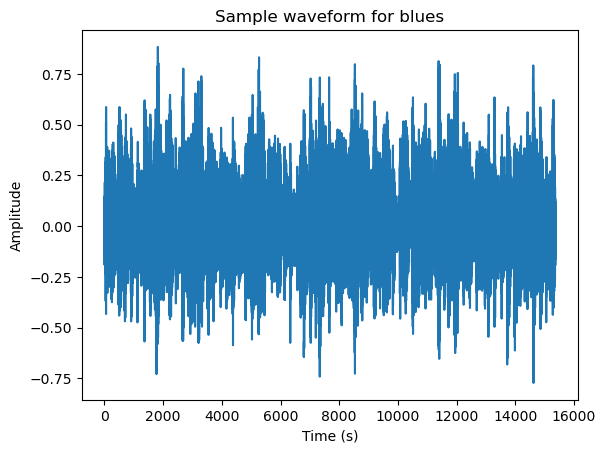

AttributeError: module 'matplotlib' has no attribute 'pyplot'

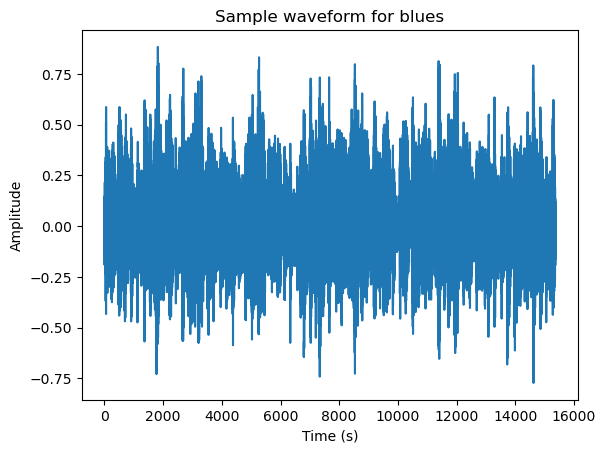

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [12]:
show_waveform('blues', '00090')

In [ ]:
show_waveform('classical', '00090')

In [ ]:
show_waveform('country', '00090')

In [ ]:
show_waveform('disco', '00090')

In [ ]:
show_waveform('hiphop', '00090')

In [ ]:
show_waveform('jazz', '00090')

In [ ]:
show_waveform('metal', '00090')

In [ ]:
show_waveform('pop', '00090')

In [ ]:
show_waveform('reggae', '00090')

In [ ]:
show_waveform('rock', '00090')

In [ ]:
def show_spectogram(x, num):
    # Load audio file
    audio_path = f'/Users/umarkabir/Documents/Qwasar/Classical Punk/genres/{x}/{x}.{num}.wav'
    y, sr = librosa.load(audio_path)

    # Calculate spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    # Convert to decibels
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Create figure
    fig = go.Figure()

    # Add heatmap trace
    fig.add_trace(go.Heatmap(
        z=S_dB,
        x=np.arange(0, S_dB.shape[1]),
        y=np.arange(0, 8000, 8000/128),
        colorscale='Viridis'
    ))

    # Set x and y axis labels
    fig.update_xaxes(title_text='Time')
    fig.update_yaxes(title_text='Frequency (Hz)')

    # Set figure title
    fig.update_layout(title_text=f'Sample spectrogram for {x}')

    # Show figure
    fig.show()


This function loads a WAV file of a specific genre and number, and generates a sample spectrogram plot using the librosa and plotly libraries. It takes two arguments, x and num, which specify the genre of the audio and the number of the audio file within that genre, respectively.

In [ ]:
show_spectogram('blues', '00090')

In [ ]:
show_spectogram('classical', '00090')

In [ ]:
show_spectogram('country', '00090')

In [ ]:
show_spectogram('disco', '00090')

In [ ]:
show_spectogram('hiphop', '00090')

In [ ]:
show_spectogram('jazz', '00090')

In [ ]:
show_spectogram('metal', '00090')

In [ ]:
show_spectogram('pop', '00090')

In [ ]:
show_spectogram('reggae', '00090')

In [ ]:
show_spectogram('rock', '00090')

In [ ]:
def show_sr(x, num):
        # Load audio file
    audio_path = f'/Users/umarkabir/Documents/Qwasar/Classical Punk/genres/{x}/{x}.{num}.wav'
    y, sr = librosa.load(audio_path)

    # Compute spectral rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

    # Create plotly trace
    trace = go.Scatter(
        x=[i for i in range(len(spectral_rolloff))],
        y=spectral_rolloff,
        mode='lines',
        name='Spectral Rolloff'
    )

    # Create plot layout
    layout = go.Layout(
        title=f'Sample spectral rolloff for {x}',
        xaxis=dict(title='Frame'),
        yaxis=dict(title='Frequency (Hz)')
    )

    # Create plot
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()


This function show_sr(x, num) loads an audio file and computes the spectral rolloff. It then creates a Plotly line plot of the spectral rolloff values with the x-axis representing the frame and the y-axis representing frequency in Hz. The title of the plot is set to "Sample spectral rolloff for x", where x is the name of the audio file.

In [ ]:
show_sr('blues', '00090')

In [ ]:
show_sr('classical', '00090')

In [ ]:
show_sr('country', '00090')

In [ ]:
show_sr('disco', '00090')

In [ ]:
show_sr('hiphop', '00090')

In [ ]:
show_sr('jazz', '00090')

In [ ]:
show_sr('metal', '00090')

In [ ]:
show_sr('pop', '00090')

In [ ]:
show_sr('reggae', '00090')

In [ ]:
show_sr('rock', '00090')

In [ ]:
def show_chroma(x, num):
    # Load audio file
    audio_path = f'/Users/umarkabir/Documents/Qwasar/Classical Punk/genres/{x}/{x}.{num}.wav'
    y, sr = librosa.load(audio_path)

    # Compute chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Create time axis in seconds
    time = librosa.frames_to_time(np.arange(chroma.shape[1]), sr=sr)

    # Create chroma note names
    chroma_note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

    # Create heatmap trace
    trace = go.Heatmap(
        x=time,
        y=chroma_note_names,
        z=chroma,
        colorscale='Viridis',
    )

    # Set layout
    layout = go.Layout(
        title=f'Sample chroma feature for {x}',
        xaxis=dict(title='Time (s)'),
        yaxis=dict(title='Chroma Note')
    )

    # Create figure and plot
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()


This function takes in two arguments x and num representing the music genre and the song number, respectively. It then loads the corresponding audio file and computes the chroma feature using librosa's chroma_stft function. It creates a time axis in seconds using frames_to_time function, and chroma note names as a list. It then creates a heatmap trace using go.Heatmap with time as the x-axis, chroma_note_names as the y-axis, and chroma as the z-axis. Finally, it sets the layout with appropriate x and y axis titles, and a title for the figure. It shows the resulting figure using fig.show().

In [ ]:
show_chroma('blues', '00090')

In [ ]:
show_chroma('classical', '00090')

In [ ]:
show_chroma('country', '00090')

In [ ]:
show_chroma('disco', '00090')

In [ ]:
show_chroma('hiphop', '00090')

In [ ]:
show_chroma('jazz', '00090')

In [ ]:
show_chroma('metal', '00090')

In [ ]:
show_chroma('pop', '00090')

In [ ]:
show_chroma('reggae', '00090')

In [ ]:
show_chroma('rock', '00090')

In [ ]:
def show_zcr(x, num):
    # Load audio file
    audio_path = f'/Users/umarkabir/Documents/Qwasar/Classical Punk/genres/{x}/{x}.{num}.wav'
    y, sr = librosa.load(audio_path)

    # Compute zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)

    # Create Plotly figure
    fig = go.Figure(data=go.Scatter(x=librosa.times_like(zcr), y=zcr[0]))
    fig.update_layout(title=f'Zero Crossing Rate for {x} Genre', xaxis_title='Time (s)', yaxis_title='ZCR')
    fig.show()

The show_zcr function takes in two arguments: x, which represents the genre of the music file, and num, which represents the number of the music file. It calculates the zero-crossing rate of the audio file and plots it using Plotly. 

In [ ]:
show_zcr('blues', '00090')

In [ ]:
show_zcr('classical', '00090')

In [ ]:
show_zcr('country', '00090')

In [ ]:
show_zcr('disco', '00090')

In [ ]:
show_zcr('hiphop', '00090')

In [ ]:
show_zcr('jazz', '00090')

In [ ]:
show_zcr('pop', '00090')

In [ ]:
show_zcr('reggae', '00090')

In [ ]:
show_zcr('rock', '00090')

<a id='summary-statistics'></a>
<font size="+1" color='#780404'><b> 4.3 Summary Statistics</b></font>  
[back to top](#table-of-contents)

In [ ]:
df.describe(include='all')

In [ ]:
import plotly.graph_objs as go
import numpy as np

def skew_kurt(data, col):
    # Calculate skewness and kurtosis of column
    _skewness = data[col].skew()
    _kurtosis = data[col].kurtosis()

    # Create histogram of column with mean, median, and mode
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data[col], nbinsx=20, histnorm='density'))
    fig.add_shape(
        type='line',
        x0=data[col].mean(),
        x1=data[col].mean(),
        y0=0,
        y1=1,
        line=dict(color='red', dash='dash')
    )
    fig.add_shape(
        type='line',
        x0=data[col].median(),
        x1=data[col].median(),
        y0=0,
        y1=1,
        line=dict(color='green', dash='dash')
    )
    fig.add_shape(
        type='line',
        x0=data[col].mode()[0],
        x1=data[col].mode()[0],
        y0=0,
        y1=1,
        line=dict(color='blue', dash='dash')
    )
    fig.update_layout(
        title='Distribution of ' + col,
        xaxis_title=col,
        yaxis_title='Density'
    )

    # Add text annotation for skewness and kurtosis values
    annotations = [
        dict(
            x=0.5,
            y=0.9,
            xref='paper',
            yref='paper',
            text='Skewness: {:.2f}'.format(_skewness),
            showarrow=False
        ),
        dict(
            x=0.5,
            y=0.85,
            xref='paper',
            yref='paper',
            text='Kurtosis: {:.2f}'.format(_kurtosis),
            showarrow=False
        )
    ]
    fig.update_layout(annotations=annotations)

    fig.show()


In [ ]:
skew_kurt(df[df['Genre'] == 'blues'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'classical'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'country'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'disco'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'hiphop'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'jazz'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'metal'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'pop'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'reggae'], 'Tempo')

In [ ]:
skew_kurt(df[df['Genre'] == 'rock'], 'Tempo')

<a id='feature-correlation'></a>
<font size="+1" color='#780404'><b> 4.4 Feature Correlation</b></font>  
[back to top](#table-of-contents)

In [ ]:
df_corr = df.corr()

In [ ]:
# Compute correlation matrix

# Set figure size and font sizes
fig, ax = plt.subplots(figsize=(50, 50))
sns.set(font_scale=1.9)

# Plot heatmap with adjusted color map
sns.heatmap(df_corr, cmap='coolwarm', annot=True, center=0, square=True)

# Adjust font size of features
ax.set_xticklabels(ax.get_xticklabels(), fontsize=35)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=35)

# Add title and axis labels
plt.title('Correlation Matrix', fontsize=30)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Features', fontsize=20)

# Show plot
plt.show()

<a id='data-preparation'></a>
<font size="+2" color='#053c96'><b> 5. Data Preparation</b></font>  
[back to top](#table-of-contents)

<a id='data-cleaning'></a>
<font size="+1" color='#780404'><b> 5.1 Data Cleaning</b></font>  
[back to top](#table-of-contents)

<a id='feature-engineering'></a>
<font size="+1" color='#780404'><b> 5.2 Feature Engineering</b></font>  
[back to top](#table-of-contents)

<a id='data-transformation'></a>
<font size="+1" color='#780404'><b> 5.3 Data Transformation</b></font>  
[back to top](#table-of-contents)
<a id='modeling'></a>

<a id='modeling'></a>

<font size="+2" color='#053c96'><b> 6. Modeling</b></font>  
[back to top](#table-of-contents)

<a id='model-selection'></a>

<font size="+1" color='#780404'><b> 6.1 Model Selection</b></font>  
[back to top](#table-of-contents)

<a id='model-training'></a>

<font size="+1" color='#780404'><b> 6.2 Model Training</b></font>  
[back to top](#table-of-contents)

<a id='model-evaluation'></a>

<font size="+1" color='#780404'><b> 6.3 Model Evaluation</b></font>  
[back to top](#table-of-contents)

<a id='hyperparameter-tuning'></a>
<font size="+1" color='#780404'><b> 6.4 Hyperparameter Tuning</b></font>  
[back to top](#table-of-contents)

<a id='results'></a>
<font size="+2" color='#053c96'><b> 7. Results</b></font>  
[back to top](#table-of-contents)

<a id='analysis-results'></a>

<font size="+1" color='#780404'><b> 7.1 Analysis Results</b></font>  
[back to top](#table-of-contents)

<a id='model-performance'></a>

<font size="+1" color='#780404'><b> 7.2 Model Performance</b></font>  
[back to top](#table-of-contents)

<a id='feature-importance'></a>

<font size="+1" color='#780404'><b> 7.3 Feature Importance</b></font>  
[back to top](#table-of-contents)

<a id='implications'></a>

<font size="+1" color='#780404'><b> 7.4 Implications</b></font>  
[back to top](#table-of-contents)

<a id='conclusion'></a>

<font size="+2" color='#053c96'><b> 8. Conclusion</b></font>  
[back to top](#table-of-contents)

<a id='summary'></a>

<font size="+1" color='#780404'><b> 8.1 Summary</b></font>  
[back to top](#table-of-contents)

<a id='limitations'></a>

<font size="+1" color='#780404'><b> 8.2 Limitations</b></font>  
[back to top](#table-of-contents)

<a id='recommendations'></a>

<font size="+1" color='#780404'><b> 8.3 Recommendations</b></font>  
[back to top](#table-of-contents)

<a id='references'></a>

<font size="+2" color='#053c96'><b> 9. References</b></font>  
[back to top](#table-of-contents)